In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_biketrips = pd.read_csv('biketrips2011.csv')
df_biketrips['StartTime'] = df_biketrips['StartTime'].astype('datetime64')
df_biketrips['EndTime'] = df_biketrips['EndTime'].astype('datetime64')
df_biketrips['StartNum'] = df_biketrips['StartNum'].astype(int)
df_biketrips['EndNum'] = df_biketrips['EndNum'].astype(int)

In [3]:
list_holidays = pd.read_csv('days_holidays.csv')['datetime'].values.tolist()
list_workdays = pd.read_csv('days_workingdays.csv')['datetime'].values.tolist()

In [4]:
# new features - to help group by hour
df_dhcombo_out = pd.DataFrame({
    'Day': df_biketrips['StartTime'].dt.date,
    'Hour': df_biketrips['StartTime'].dt.hour,
})

df_dhcombo_in = pd.DataFrame({
    'Day': df_biketrips['EndTime'].dt.date,
    'Hour': df_biketrips['EndTime'].dt.hour,
})

df_biketrips['StartHour'] = pd.to_datetime(df_dhcombo_out.Day) + pd.to_timedelta(df_dhcombo_out.Hour, unit='h')
df_biketrips['EndHour'] = pd.to_datetime(df_dhcombo_in.Day) + pd.to_timedelta(df_dhcombo_in.Hour, unit='h')

In [20]:
start_31200 = df_biketrips.groupby('StartNum').get_group(31200).sort_values('StartTime').set_index('StartTime')
start_31200['chg'] = -1
start_31103 = df_biketrips.groupby('StartNum').get_group(31103).sort_values('StartTime').set_index('StartTime')
start_31103['chg'] = -1
end_31200 = df_biketrips.groupby('EndNum').get_group(31200).sort_values('EndTime').set_index('EndTime')
end_31200['chg'] = 1
end_31103 = df_biketrips.groupby('EndNum').get_group(31103).sort_values('EndTime').set_index('EndTime')
end_31103['chg'] = 1

In [212]:
flow = start_31103['chg']
flow = flow.append(end_31103['chg'])

In [213]:
flow = flow.sort_index()
df_flow = pd.DataFrame(flow)

In [214]:
df_flow['time'] = df_flow.index.time
df_flow['date'] = df_flow.index.date
df_flow['delta'] = df_flow.groupby(pd.TimeGrouper('D'))['chg'].cumsum()

/Users/Derek/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


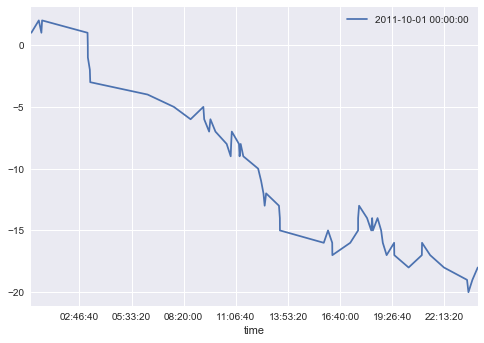

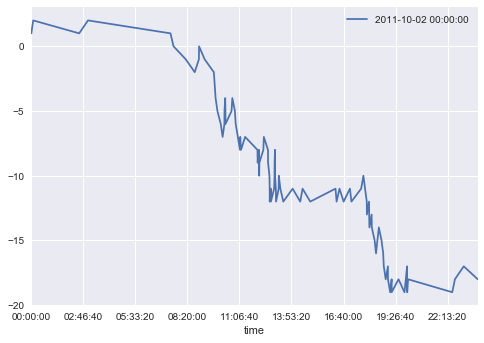

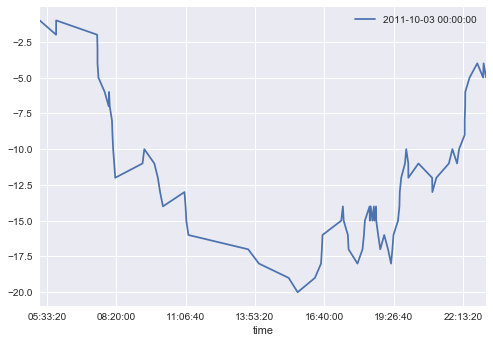

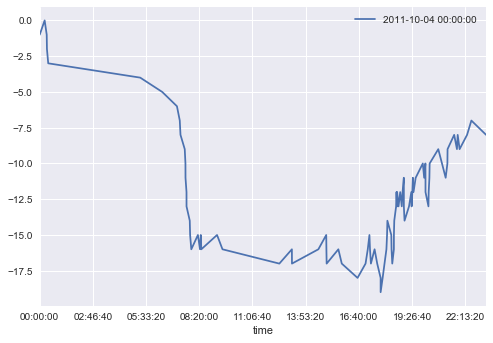

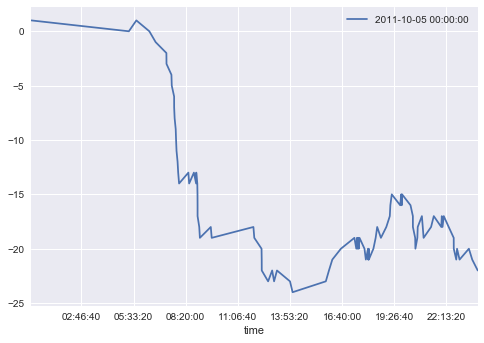

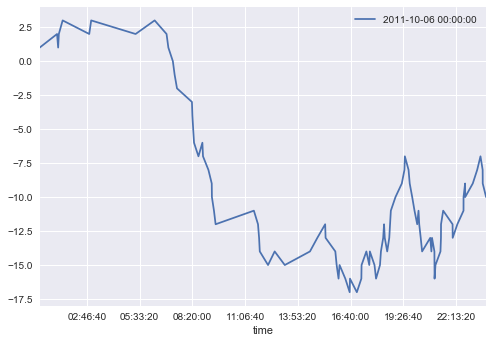

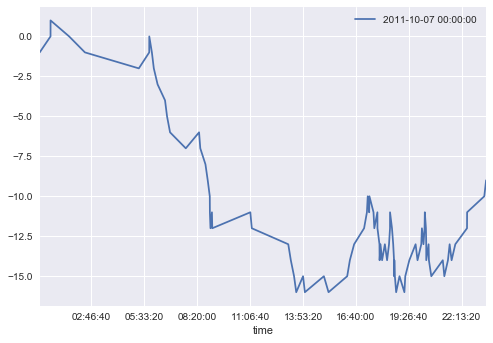

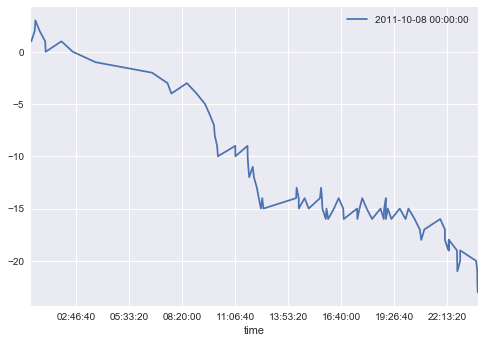

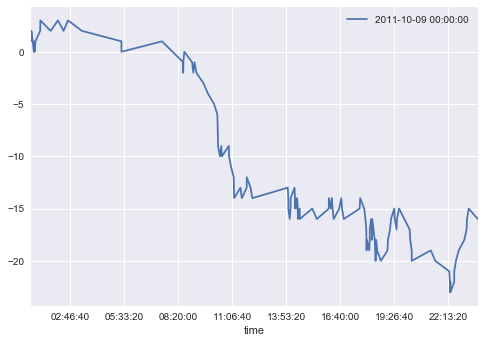

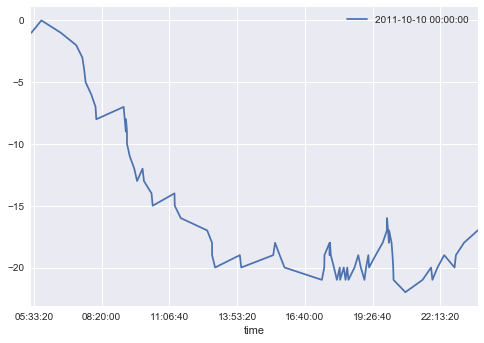

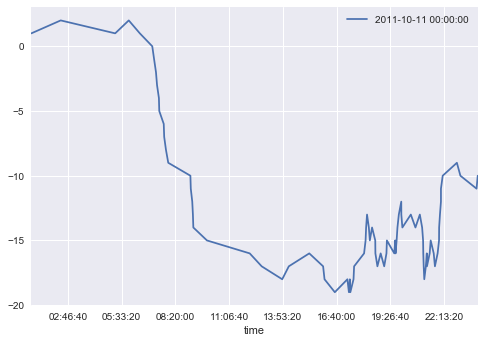

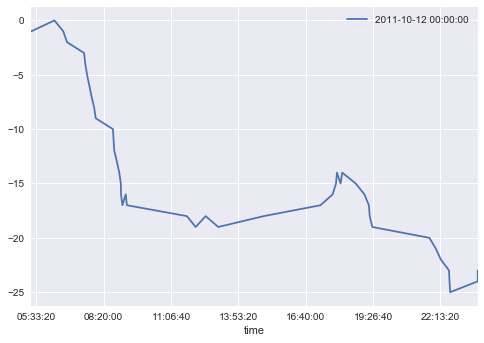

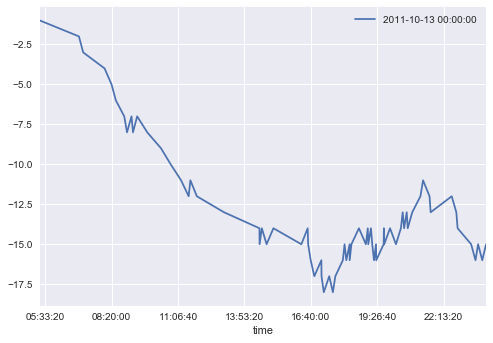

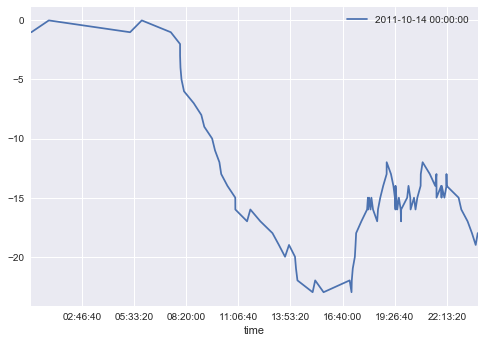

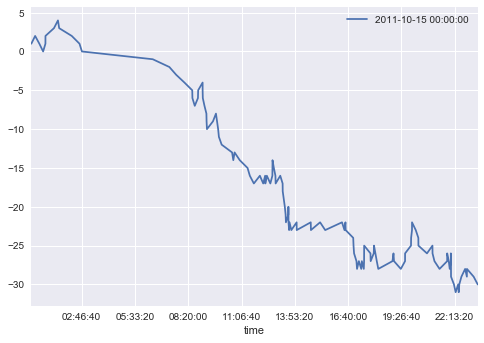

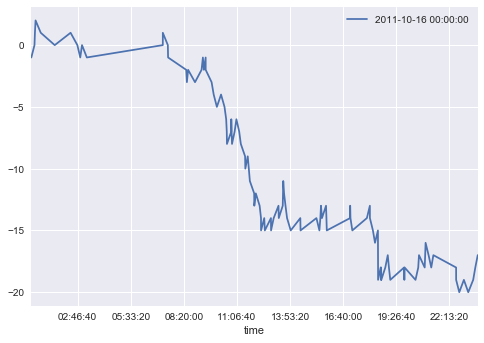

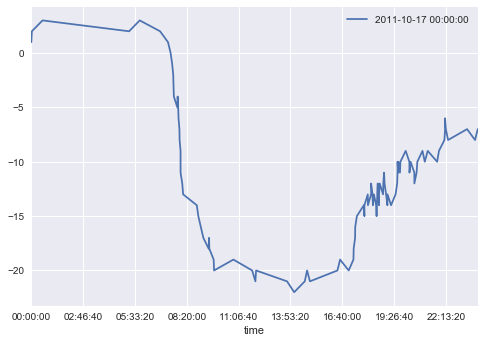

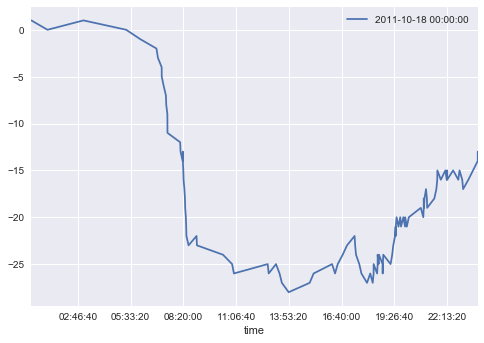

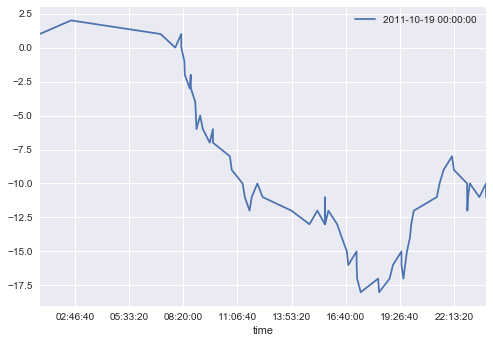

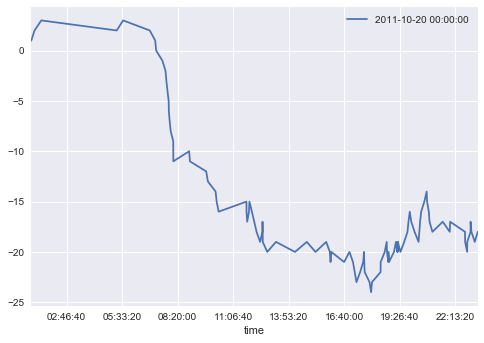

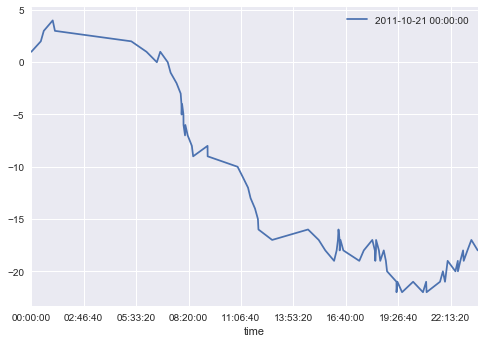

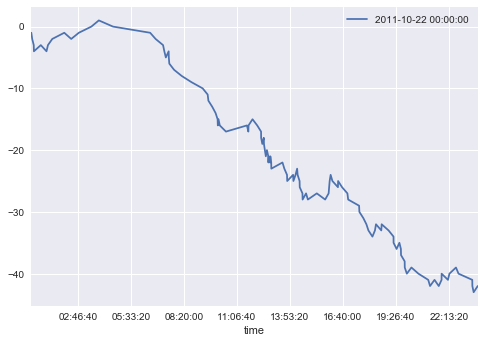

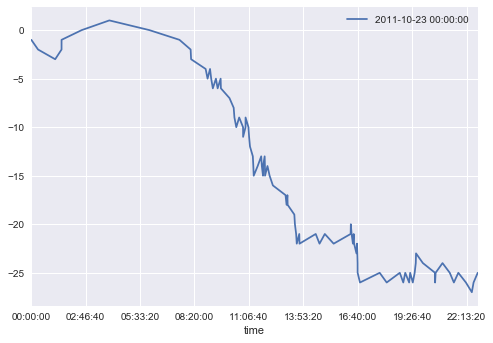

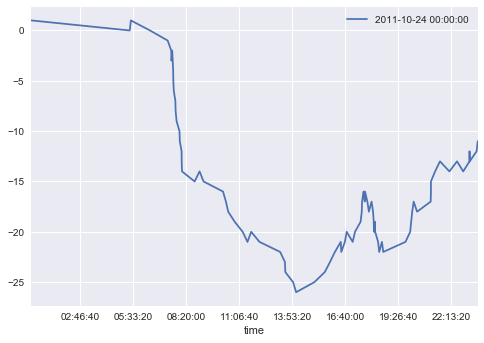

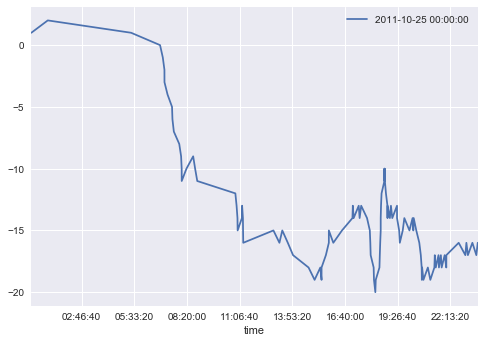

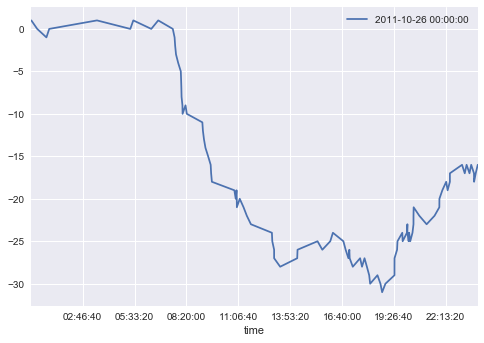

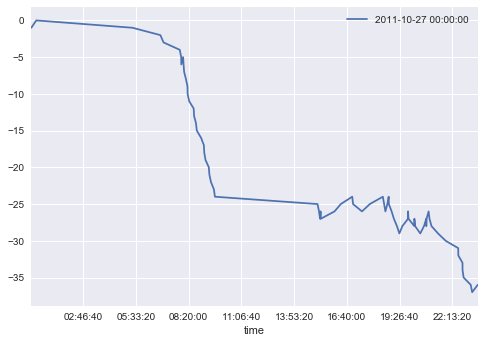

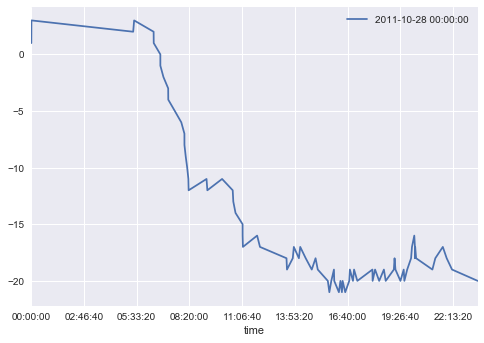

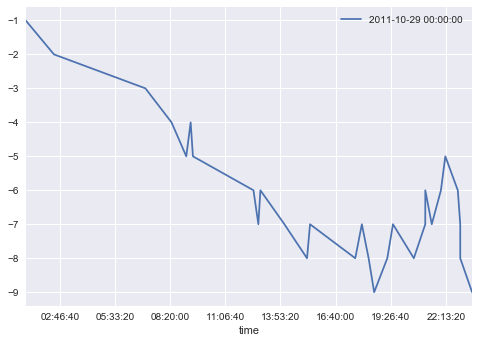

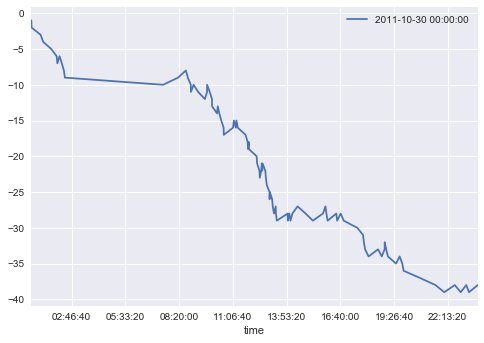

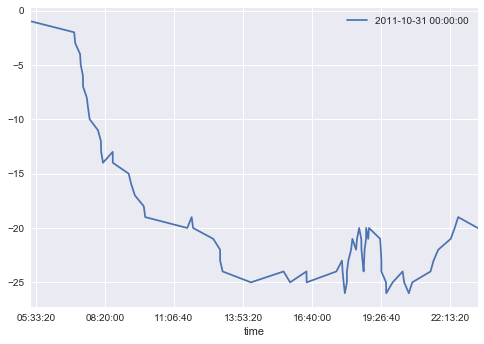

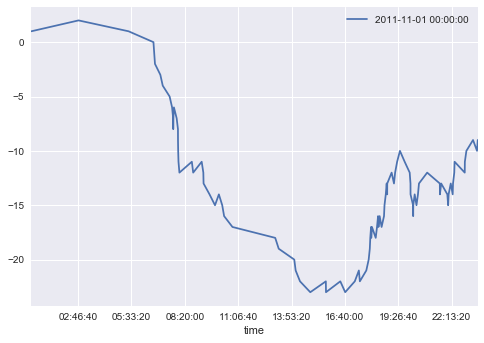

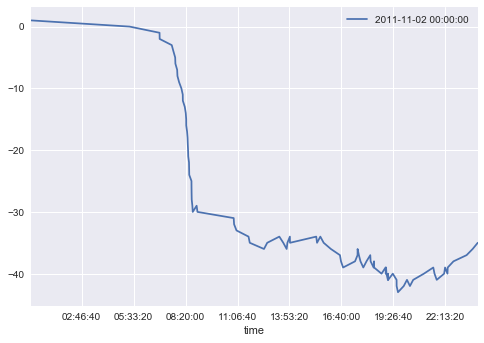

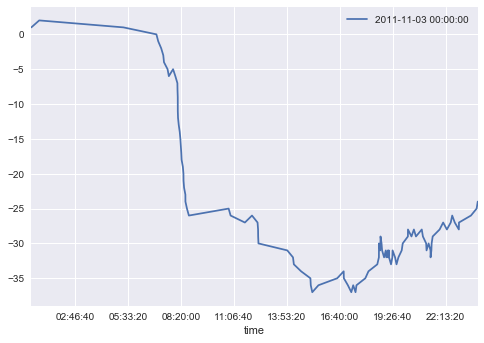

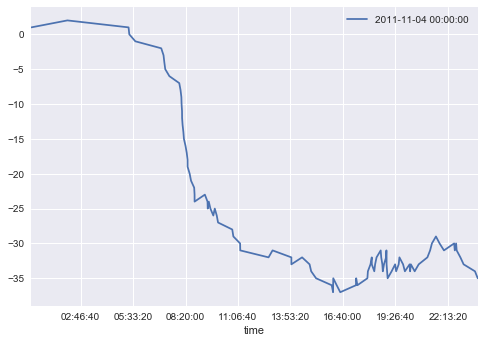

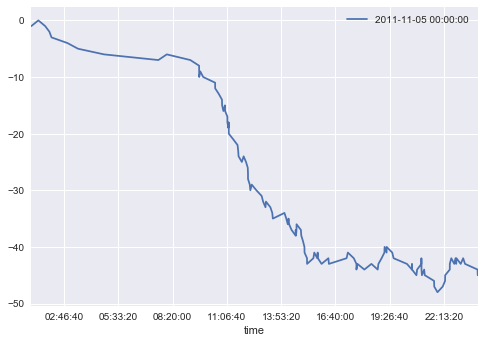

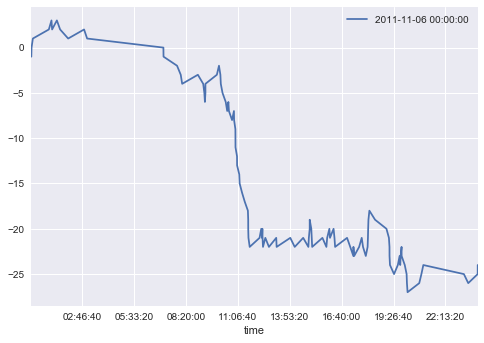

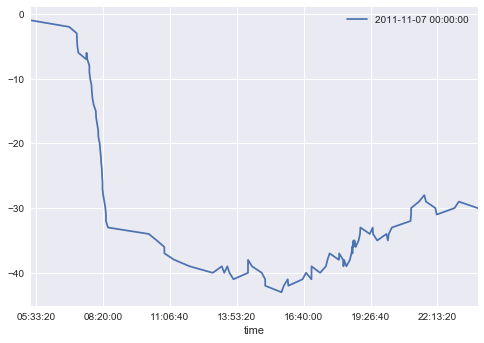

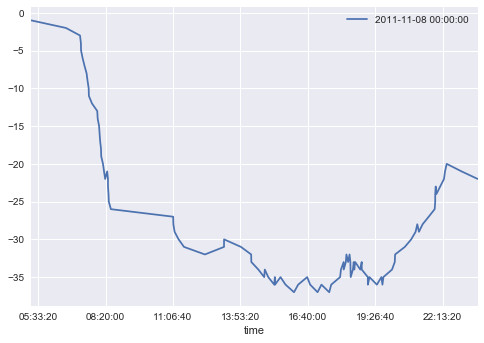

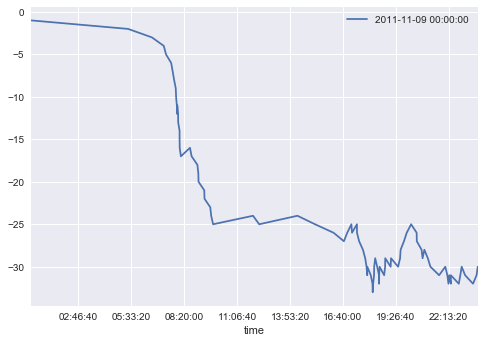

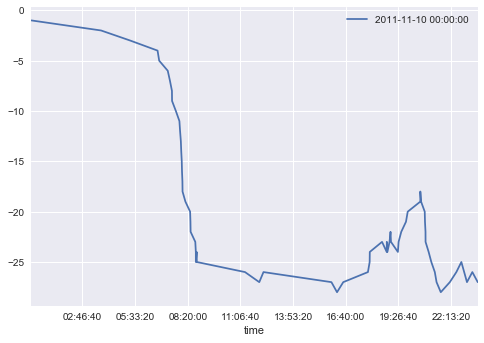

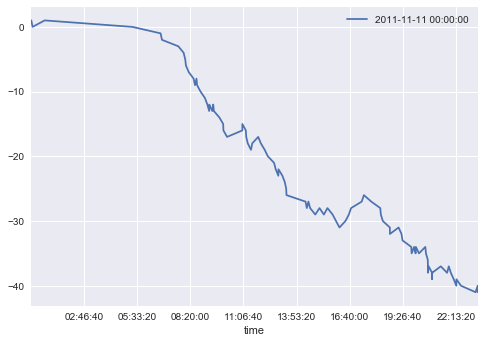

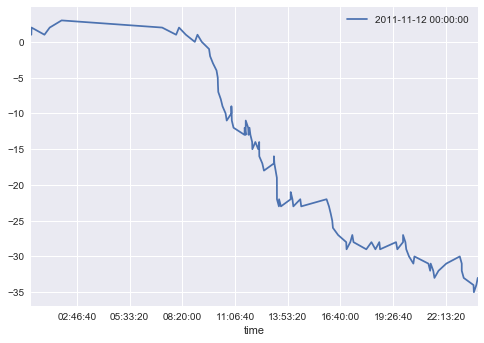

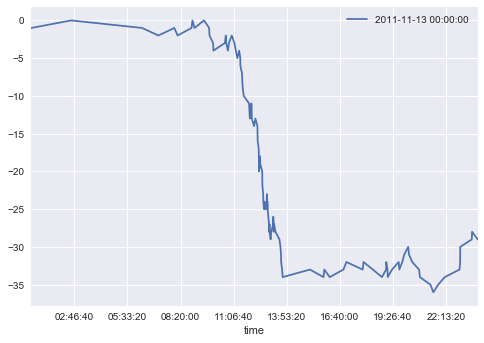

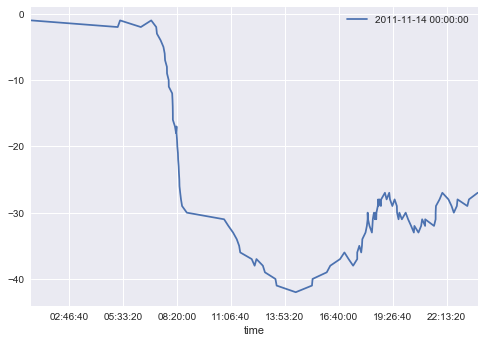

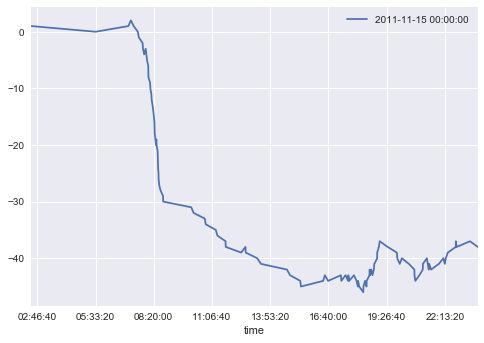

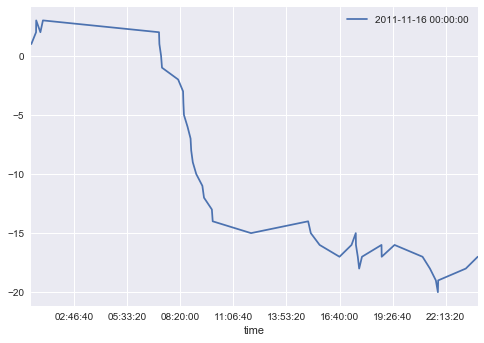

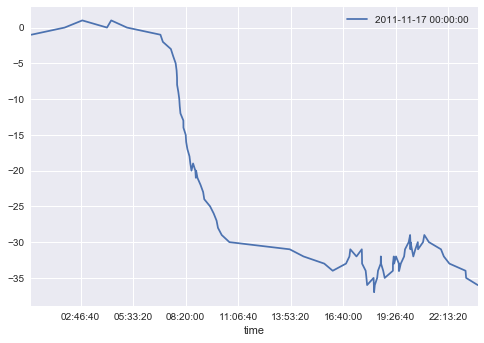

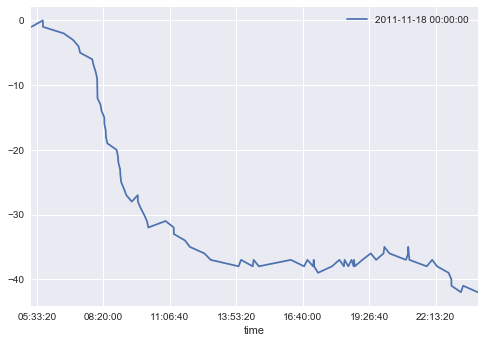

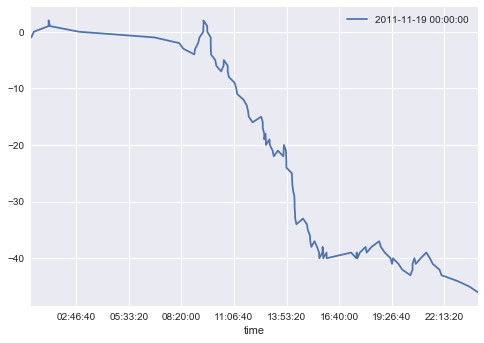

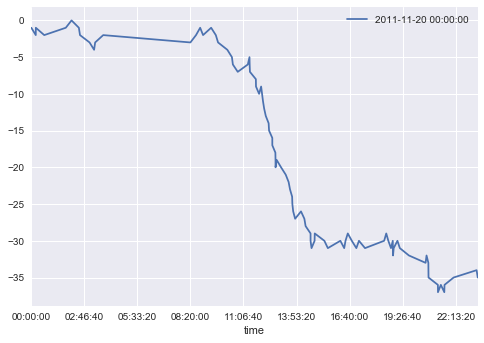

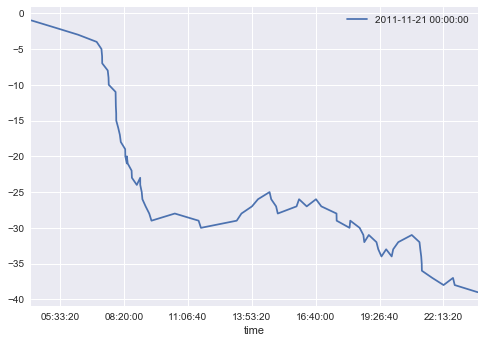

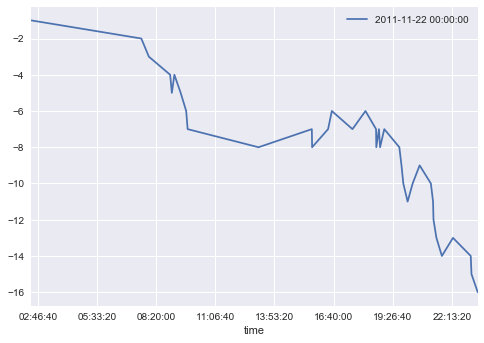

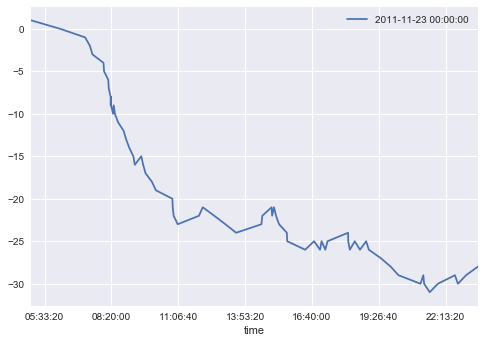

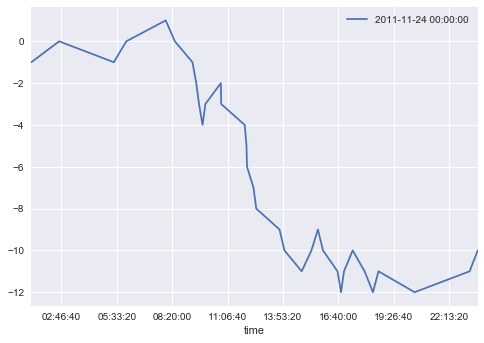

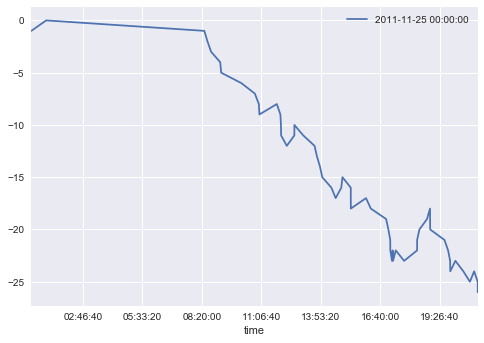

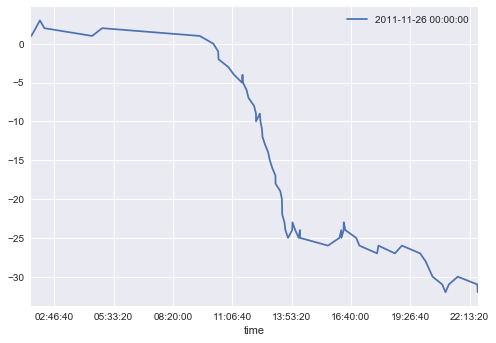

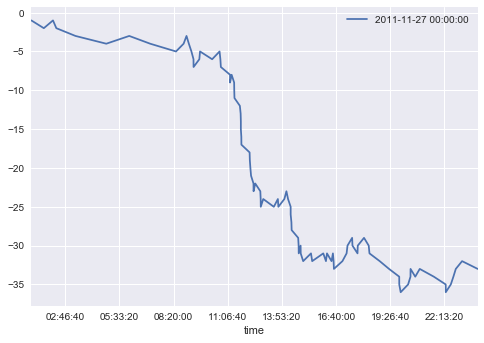

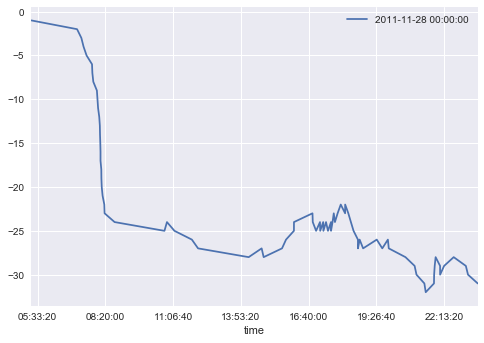

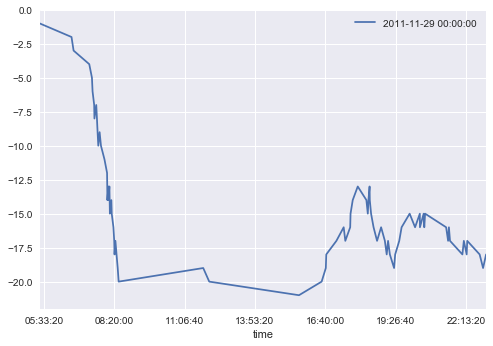

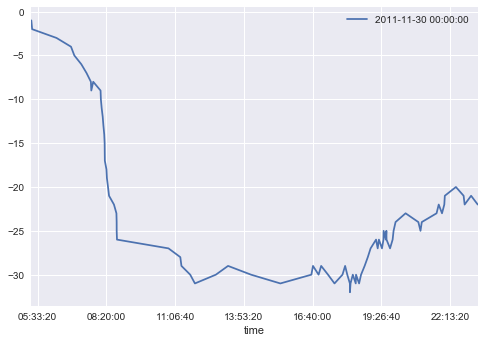

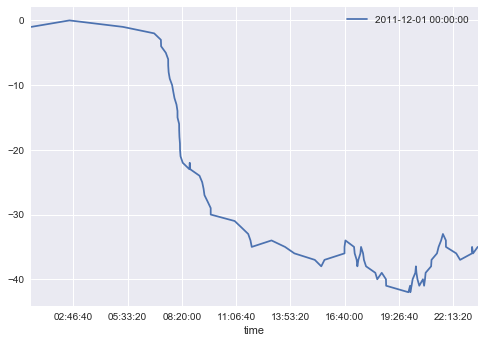

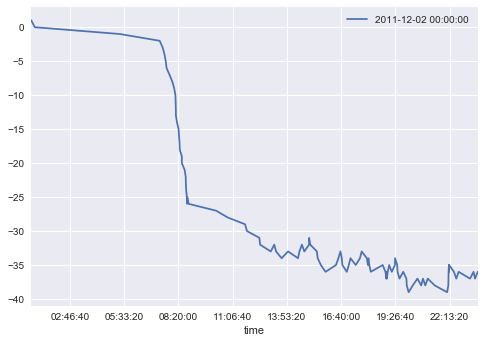

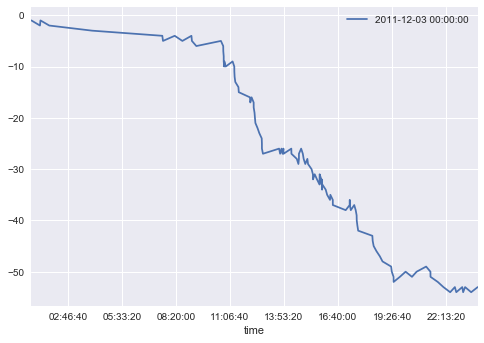

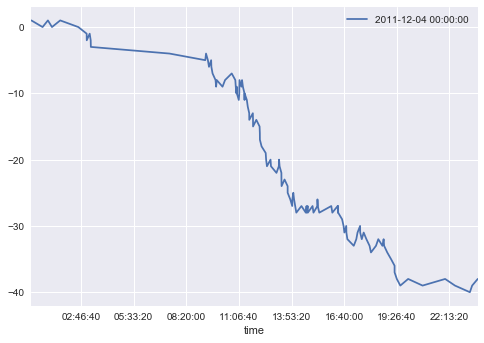

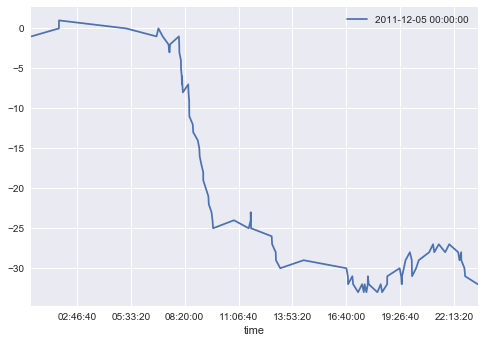

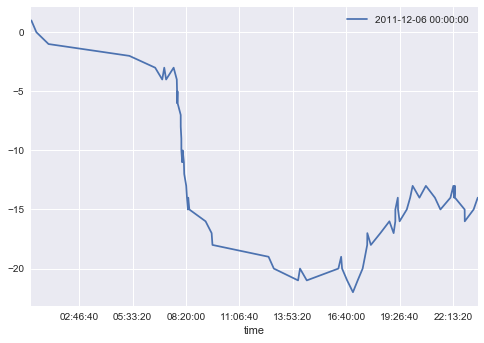

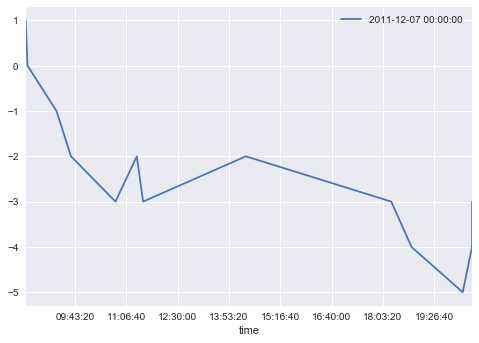

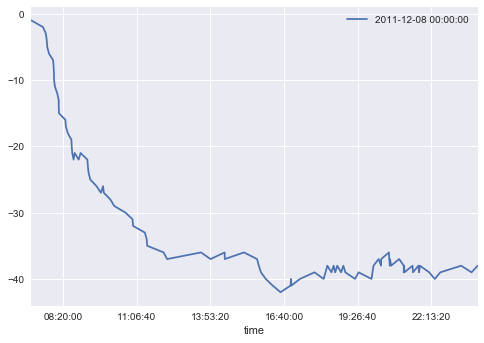

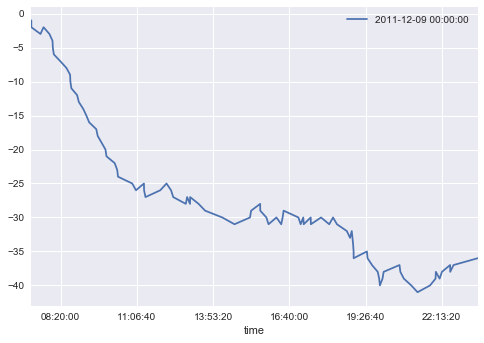

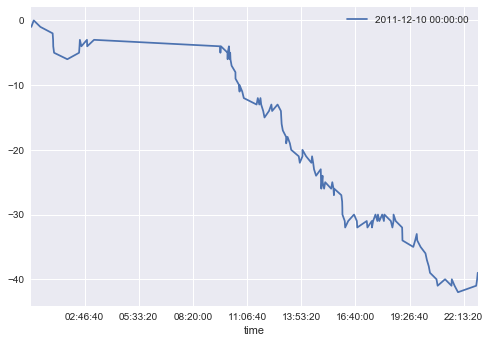

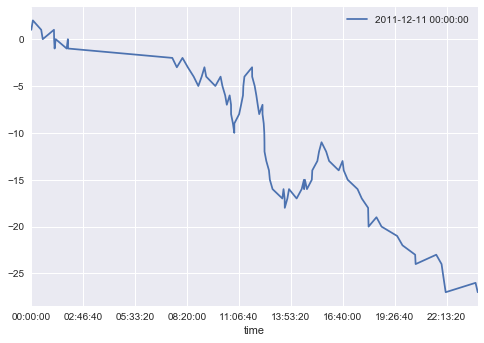

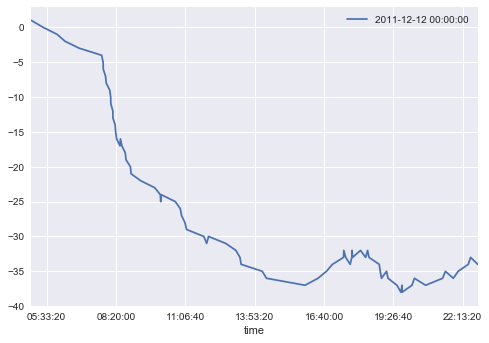

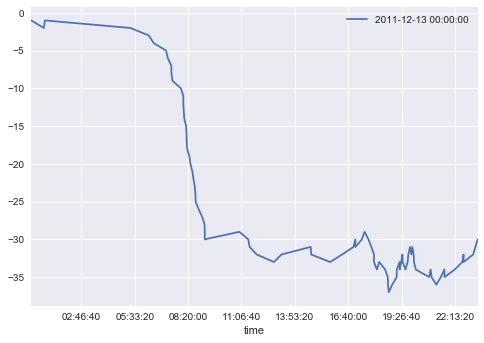

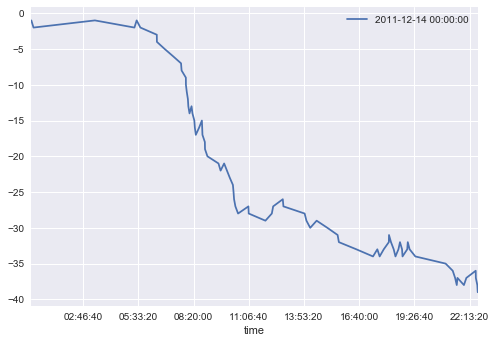

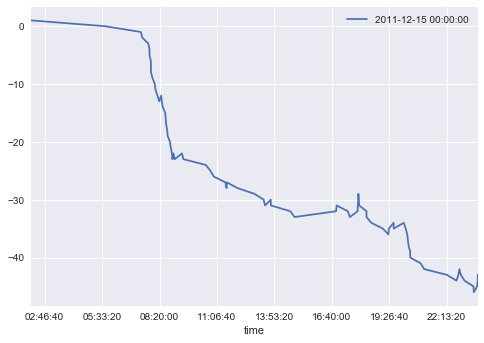

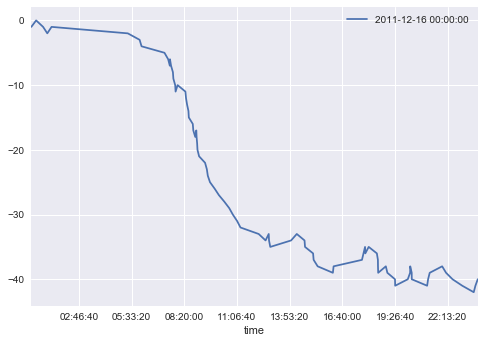

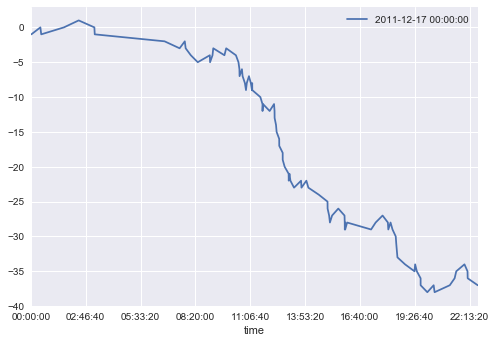

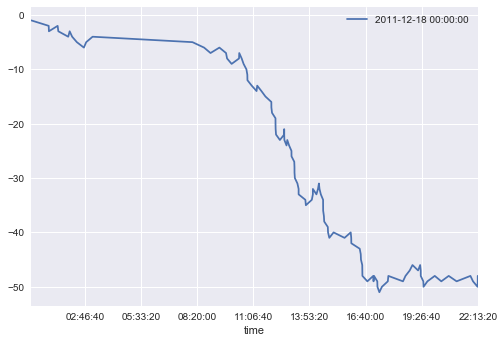

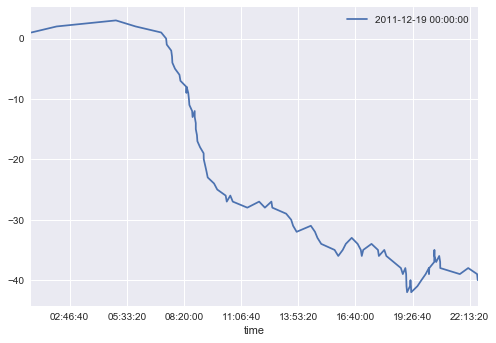

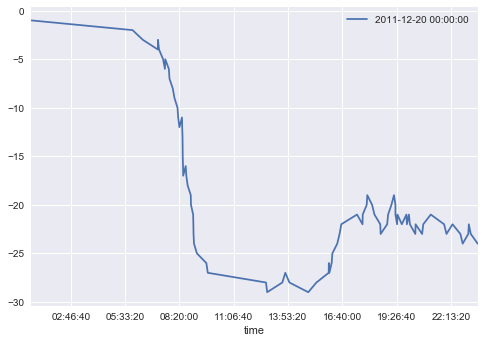

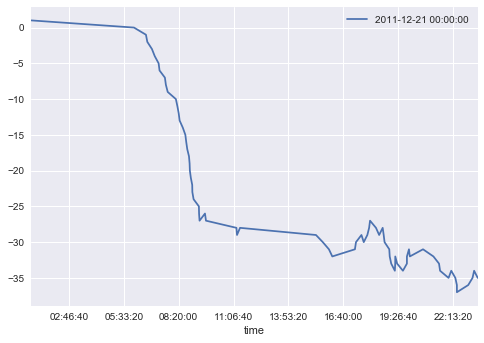

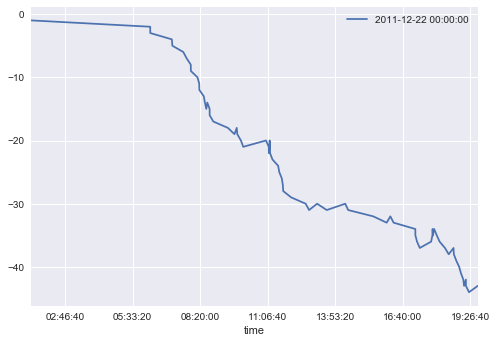

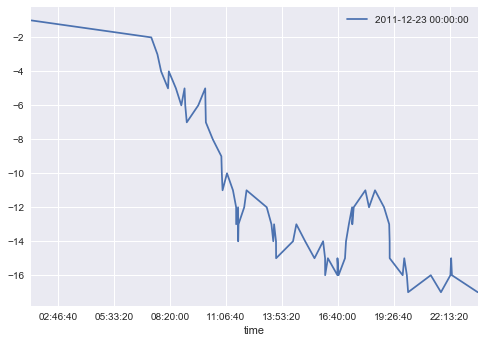

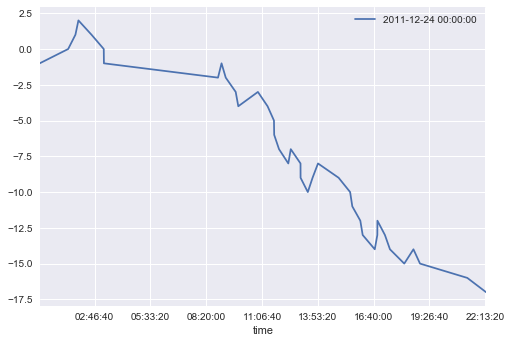

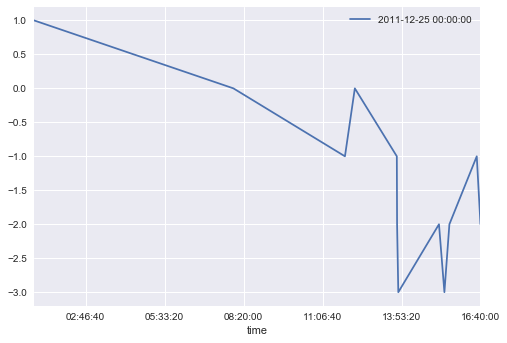

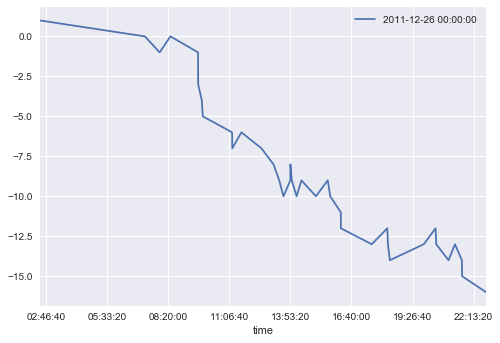

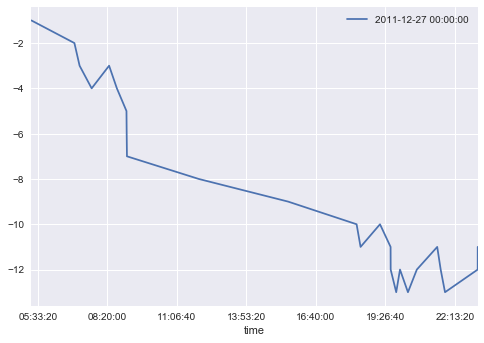

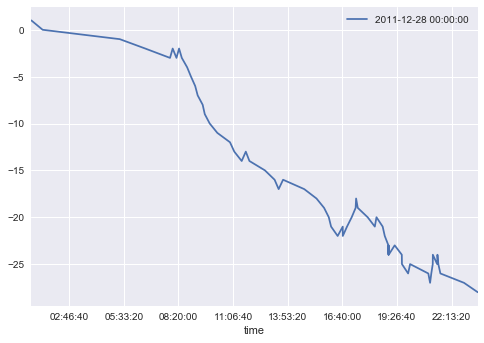

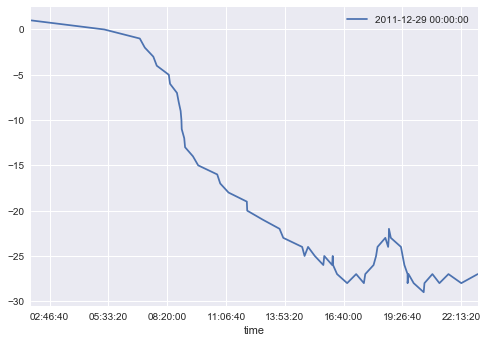

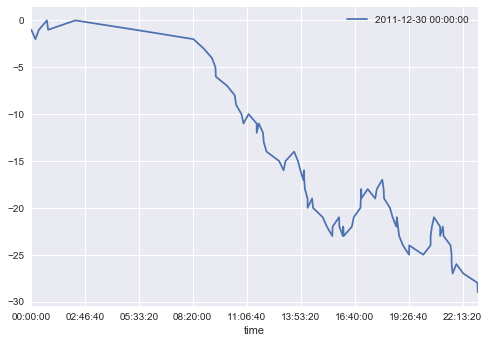

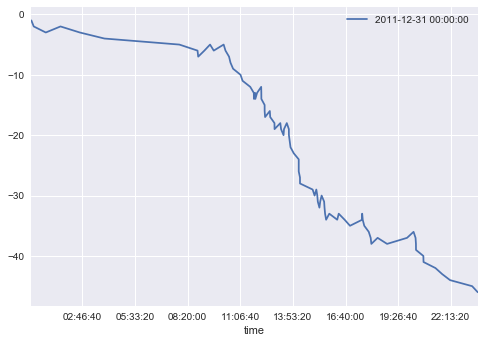

In [215]:
for date,data in df_flow.loc['2011-10':'2011-12'].groupby(pd.TimeGrouper('D')):
    data_group = data.set_index('time')
    data_group.plot(y='delta',label=date)
plt.show()